In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import linearmodels.iv.model as lm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

## Load diabetes dataset

In [2]:
diabetes_data = load_diabetes(as_frame=True)
print(diabetes_data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
diabetes_df = diabetes_data["frame"]
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## i) Data Pre-processing and Exploratory data analysis

- Checking for any missing or NA values

In [4]:
# Check for missing values (NaN)
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [5]:
# Check for missing values (NaN)
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
# Check if there are any missing values in the DataFrame
diabetes_df.isna().any().any()

False

- Exploratory Data Analysis

In [7]:
# Summary Statistics
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


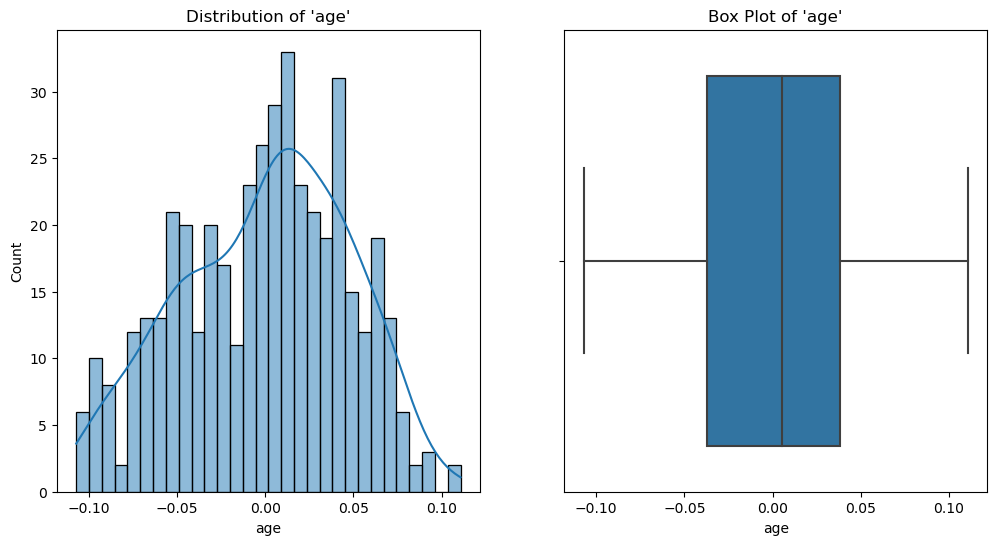

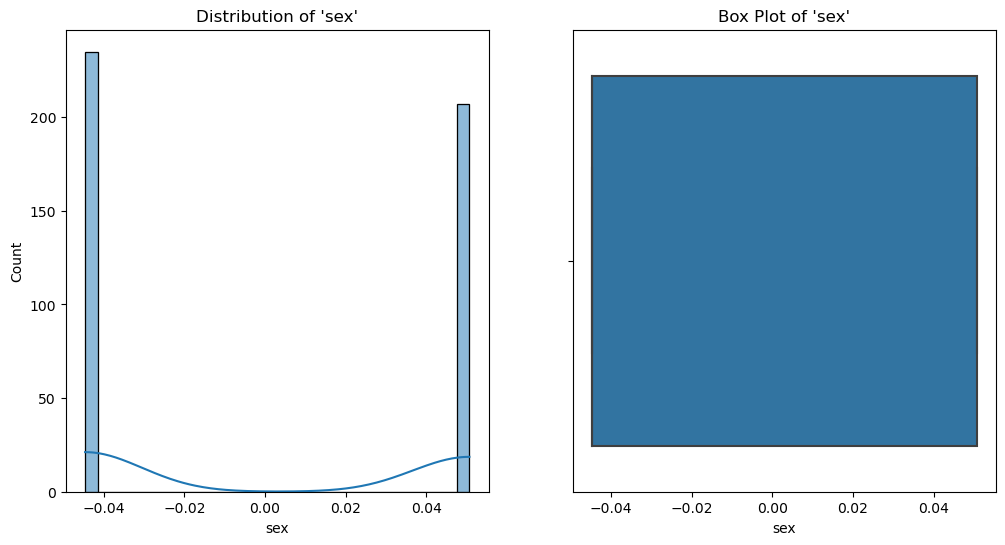

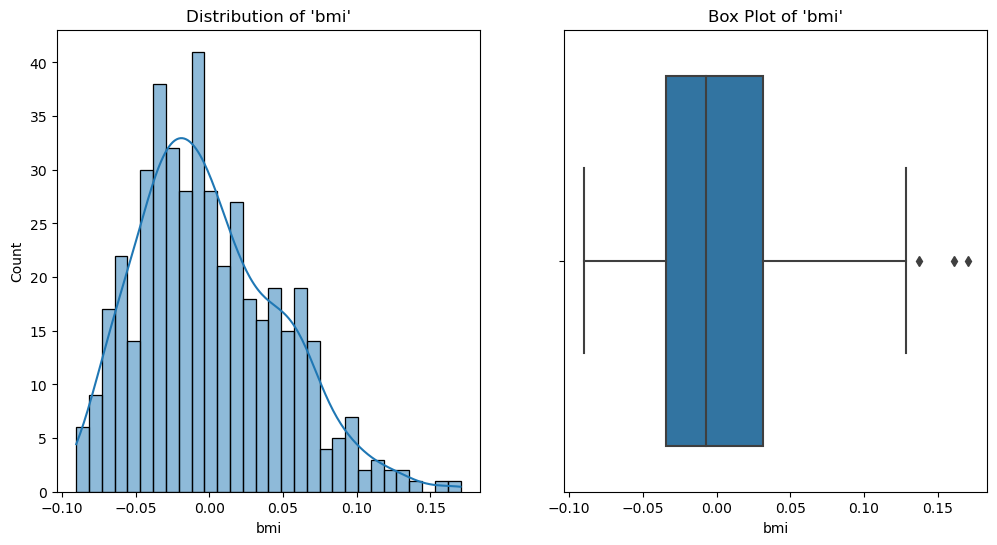

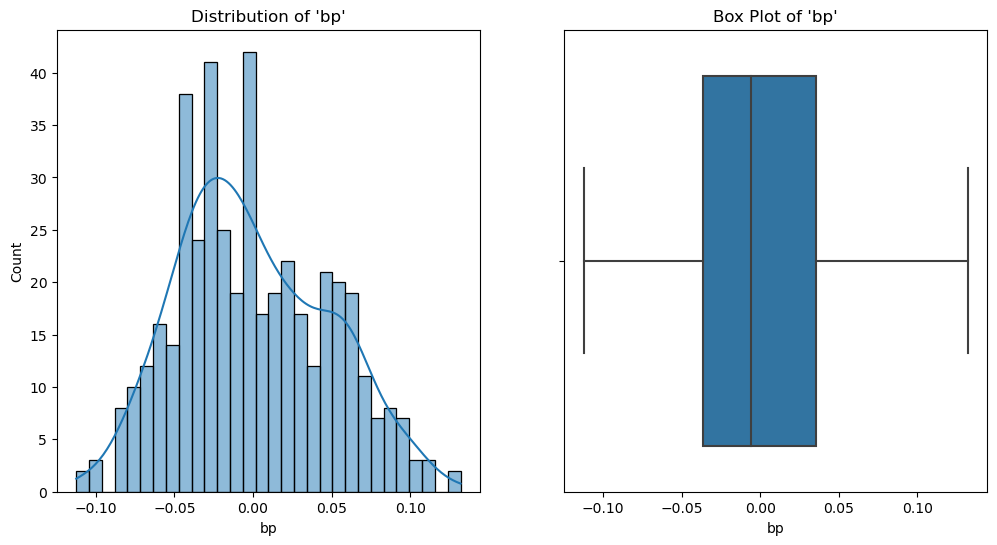

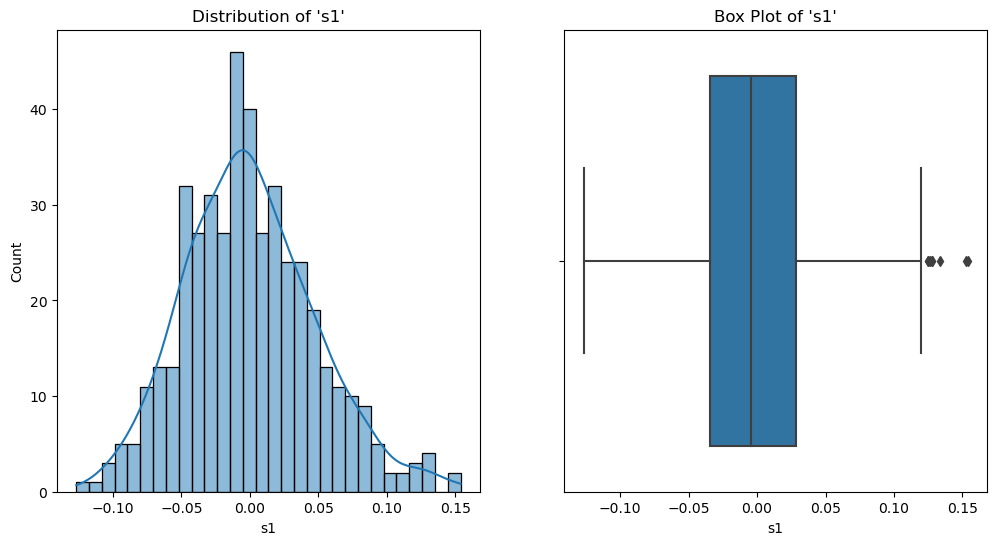

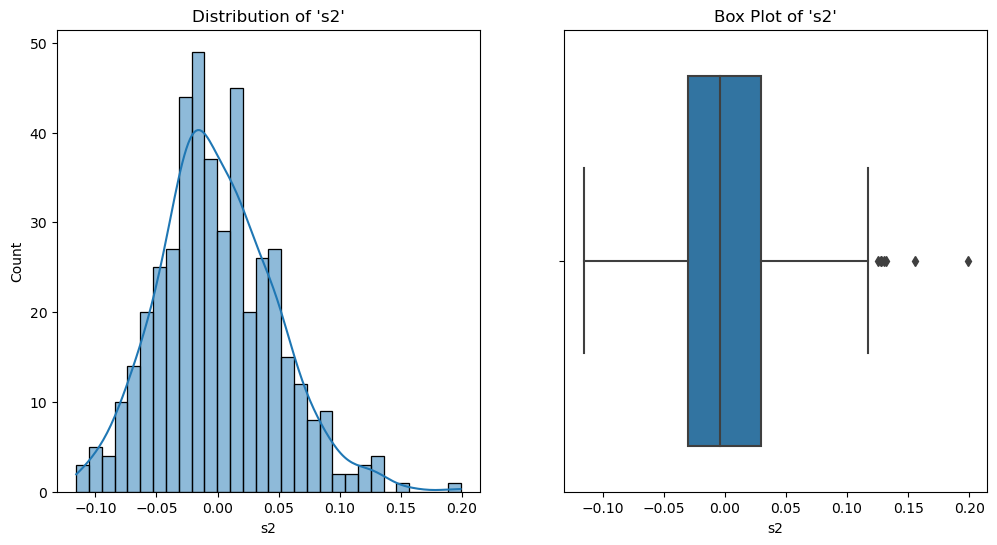

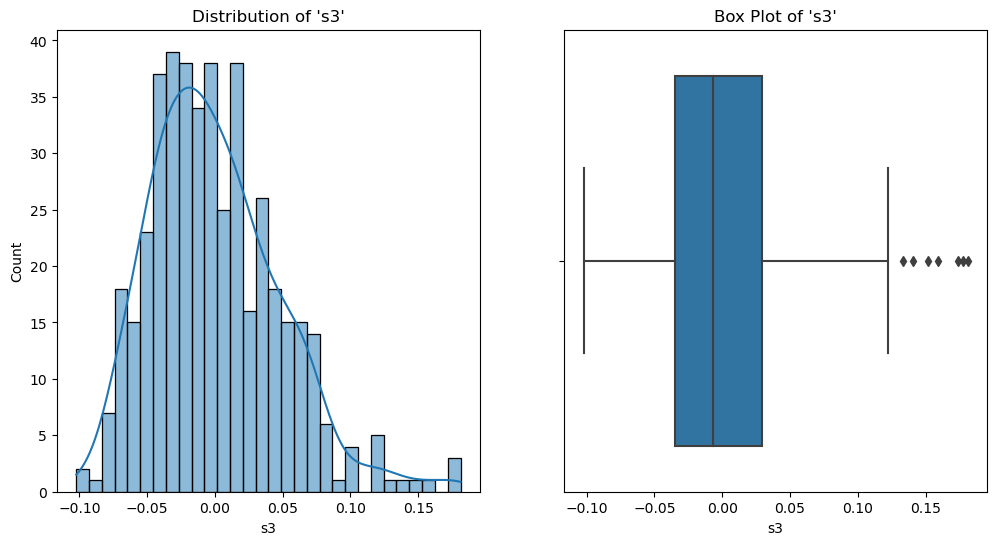

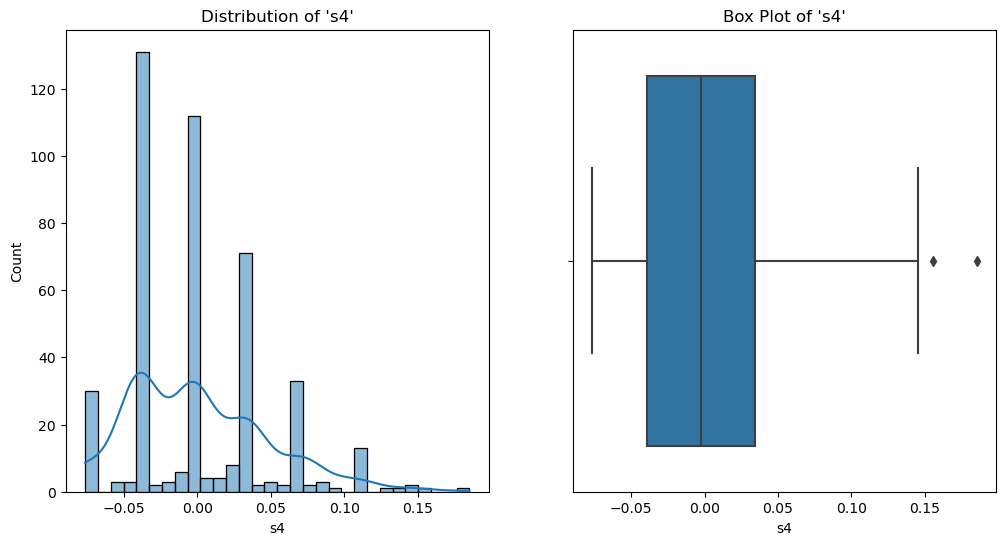

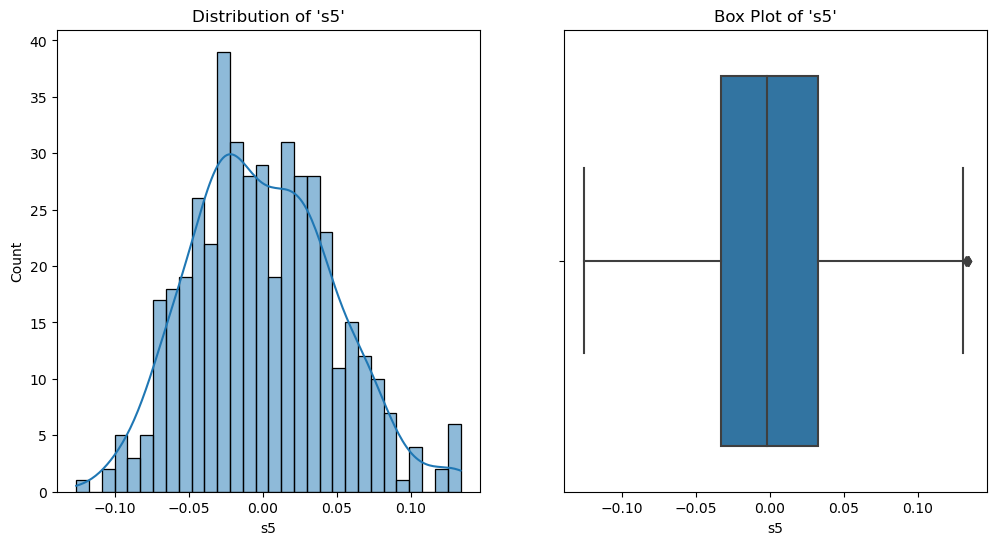

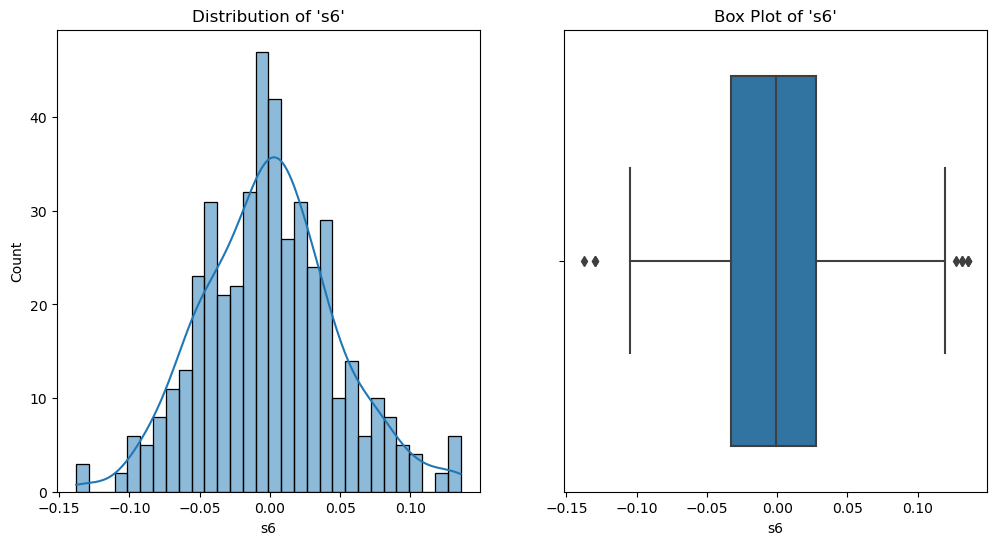

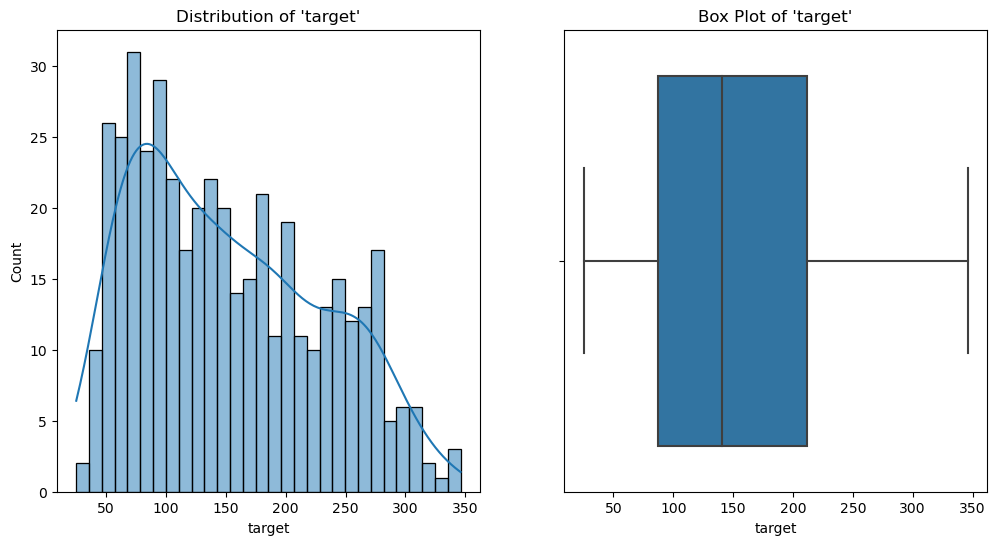

In [8]:
# Visualizing Distributions
for column in diabetes_df.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(diabetes_df[column], bins=30, kde=True)
    plt.title(f"Distribution of '{column}'")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diabetes_df[column])
    plt.title(f"Box Plot of '{column}'")
    plt.show()

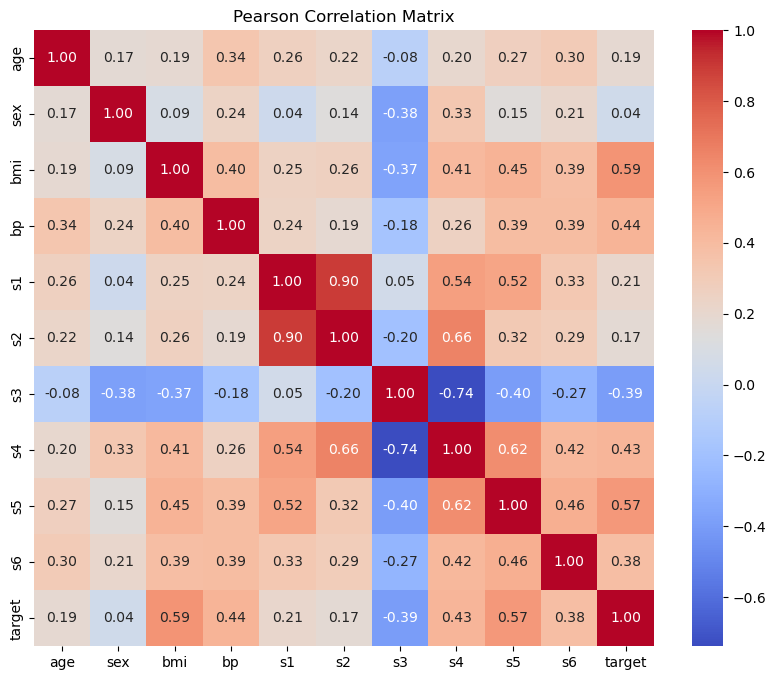

In [9]:
# Pearson Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix")
plt.show()

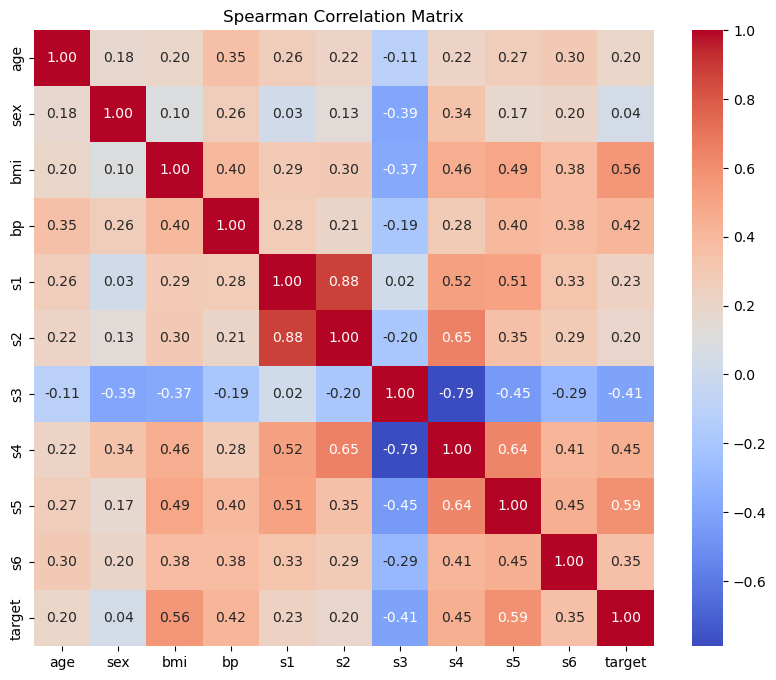

In [10]:
# Spearman Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(method='spearman'), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix")
plt.show()

- Preprocessing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_df[diabetes_data["feature_names"]], 
    diabetes_df[["target"]], 
    test_size=0.2, 
    random_state=2024
)

## ii) Data modelling

- i) required - report the coefficients and p-values of OLS by manually implementing them

In [12]:
# Add a constant to the model (for the intercept)
X_train_const = sm.add_constant(X_train)

# Fit the model
ols_model = sm.OLS(y_train, X_train_const)
ols_fitted_model = ols_model.fit()

ols_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     37.56
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.62e-49
Time:                        02:30:39   Log-Likelihood:                -1901.1
No. Observations:                 353   AIC:                             3824.
Df Residuals:                     342   BIC:                             3867.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.8072      2.862     53.747      0.000     148.179     159.436
age          -10.9602     67.705     -0.162      0.871    -144.131     122.211
sex         -236.9298     68.833     -3.442      0.001    -372.320    -101.540
bmi          511.8289     71.739      7.135      0.000     370.723     652.935
bp           369.8556     72.380      5.110      0.000     227.489     512.222
s1          -826.7088    460.009     -1.797      0.073   -1731.512      78.094
s2           483.3893    372.397      1.298      0.195    -249.088    1215.867
s3            97.4578    234.725      0.415      0.678    -364.228     559.144
s4           135.1072    178.777      0.756      0.450    -216.533     486.747
s5           745.5196    186.687      3.993      0.000     378.320    1112.719
s6            58.4326     74.940      0.780      0.436     -88.969     205.834
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.500
Skew:                           0.039   Prob(JB):                        0.472
Kurtosis:                       2.690   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ii) other models

In [13]:
# Initialize KFold
cv = KFold(n_splits = 5, 
           shuffle = True,
           random_state = 2024
     )

X = diabetes_df[diabetes_data["feature_names"]]
y = diabetes_df[["target"]]

def cv_model(model, cv, X, y):
    for train_index, test_index in cv.split(X):   
        X_train = X.loc[train_index]
        X_test  = X.loc[test_index]
        y_train = y.loc[train_index]
        y_test =  y.loc[test_index]

        # Fit model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        
    return model

In [14]:
# Fit the Linear Regression model with KFold
linear_model = cv_model(LinearRegression(), cv, X, y)

In [15]:
# Fit the Ridge Regression model with KFold
ridge_model = cv_model(Ridge(alpha=1.0), cv, X, y)    

In [16]:
# Fit the Lasso Regression model with KFold
lasso_model = cv_model(Lasso(alpha=0.1), cv, X, y)    

In [17]:
# Fit the ElasticNet Regression model with KFold
elasticnet_model = cv_model(ElasticNet(alpha=1.0, l1_ratio=0.5), cv, X, y)    

In [18]:
# Fit a polynomial regression model with interaction terms only, with KFold
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2, interaction_only=True), 
    LinearRegression()
)
poly_model = cv_model(poly_pipeline, cv, X, y)   

In [19]:
# Fit the Support Vector Regression model ("linear") with KFold
svr_linear_model = cv_model(SVR(kernel="linear", C=1.0, epsilon=0.1), cv, X, y)   

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [20]:
# Fit the Support Vector Regression model ("poly") with KFold
svr_poly_model = cv_model(SVR(kernel="poly", C=1.0, epsilon=0.1), cv, X, y)   

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [21]:
# Fit the Support Vector Regression model ("rbf") with KFold
svr_rbf_model = cv_model(SVR(kernel='rbf', C=1.0, epsilon=0.1), cv, X, y)   

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## iii) Model evaluation and validation

In [22]:
def cv_results(model, X, y, cv):
    cv_results = cross_validate(model, X, y, scoring='neg_mean_squared_error', cv = cv)
    mse = np.mean(abs(cv_results["test_score"]))
    
    return mse

mse_df = pd.DataFrame()

In [23]:
X_test_const = sm.add_constant(X_test)
y_pred_ols = ols_fitted_model.predict(X_test_const)
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_df = mse_df.append({"Model": "OLS", "MSE": mse_ols}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19316\995456701.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = mse_df.append({"Model": "OLS", "MSE": mse_ols}, ignore_index=True)


In [24]:
mse_linear = cv_results(linear_model, X, y, cv)
mse_df = mse_df.append({"Model": "Linear", "MSE": mse_linear}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19316\3303888234.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = mse_df.append({"Model": "Linear", "MSE": mse_linear}, ignore_index=True)


In [25]:
mse_ridge = cv_results(ridge_model, X, y, cv)
mse_df = mse_df.append({"Model": "Ridge", "MSE": mse_ridge}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19316\2254608600.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = mse_df.append({"Model": "Ridge", "MSE": mse_ridge}, ignore_index=True)


In [26]:
mse_lasso = cv_results(lasso_model, X, y, cv)
mse_df = mse_df.append({"Model": "Lasso", "MSE": mse_lasso}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19316\1918696629.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = mse_df.append({"Model": "Lasso", "MSE": mse_lasso}, ignore_index=True)


In [27]:
mse_elasticnet = cv_results(elasticnet_model, X, y, cv)
mse_df = mse_df.append({"Model": "ElasticNet", "MSE": mse_elasticnet}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19316\2777151084.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = mse_df.append({"Model": "ElasticNet", "MSE": mse_elasticnet}, ignore_index=True)


In [28]:
mse_poly = cv_results(poly_model, X, y, cv)
mse_df = mse_df.append({"Model": "Poly", "MSE": mse_poly}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19316\1587851684.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = mse_df.append({"Model": "Poly", "MSE": mse_poly}, ignore_index=True)


In [29]:
mse_svr_linear = cv_results(svr_linear_model, X, y, cv)
mse_df = mse_df.append({"Model": "SVR_Linear", "MSE": mse_svr_linear}, ignore_index=True)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [30]:
mse_svr_poly = cv_results(svr_poly_model, X, y, cv)
mse_df = mse_df.append({"Model": "SVR_Poly", "MSE": mse_svr_poly}, ignore_index=True)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [31]:
mse_svr_rbf = cv_results(svr_rbf_model, X, y, cv)
mse_df = mse_df.append({"Model": "SVR_RBF", "MSE": mse_svr_rbf}, ignore_index=True)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [32]:
mse_df

,Model,MSE
0,OLS,3210.683497
1,Linear,2978.665948
2,Ridge,3410.849352
3,Lasso,3005.306038
4,ElasticNet,5890.747602
5,Poly,3334.318554
6,SVR_Linear,5933.318583
7,SVR_Poly,4476.812576
8,SVR_RBF,4965.797732


## iv) Discuss the outcome.



## v) Other experiments (if any)

In [33]:
# mlr2 = lm.IV2SLS(dependent=df["lwage"], exog=df["exper"], endog=df["educ"], instruments=df[["meduc","feduc"]]).fit(cov_type="homoskedastic", debiased=True)
# print(mlr2.wu_hausman())

In [34]:
# print(mlr2.sargan)